## Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv("titanic_train.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

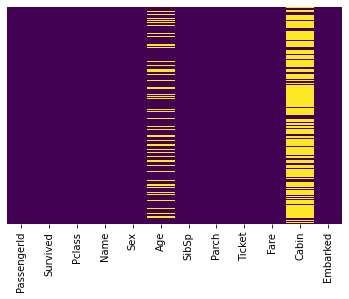

In [9]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

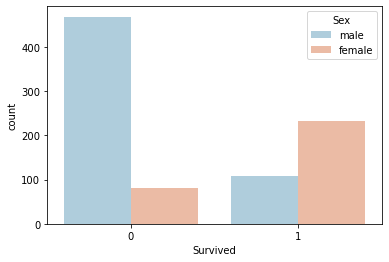

In [12]:
sns.countplot(x='Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

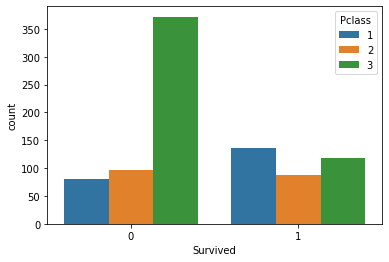

In [13]:
sns.countplot(x='Survived', hue = 'Pclass', data = train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

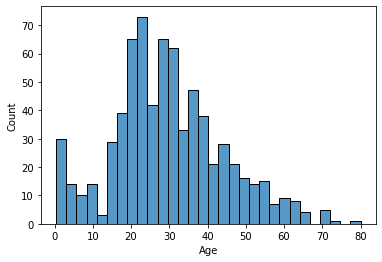

In [15]:
sns.histplot(train['Age'].dropna(), bins = 30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

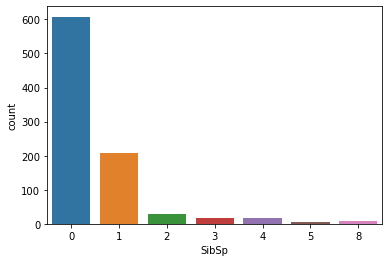

In [17]:
sns.countplot(x = 'SibSp', data = train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

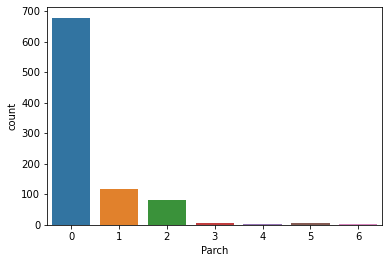

In [18]:
sns.countplot(x = 'Parch', data = train)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

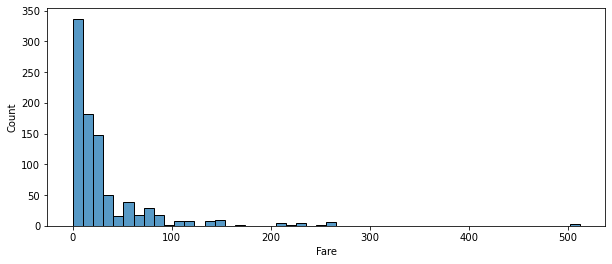

In [33]:
plt.figure(figsize = (10,4))
sns.histplot(train['Fare'], bins=50)

## Cleaning the Data

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

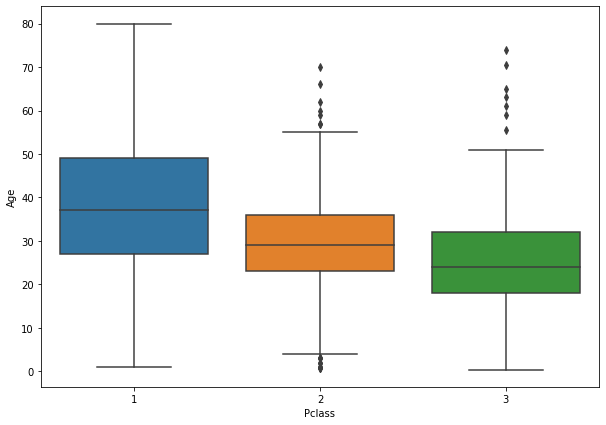

In [34]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data= train)

#### Imputing the Age by Class

In [35]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [36]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


No more null on Age Column

#### Dropping the Cabin column

In [39]:
train.drop('Cabin' , axis = 1, inplace = True)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [41]:
train.dropna(inplace = True)

<AxesSubplot:>

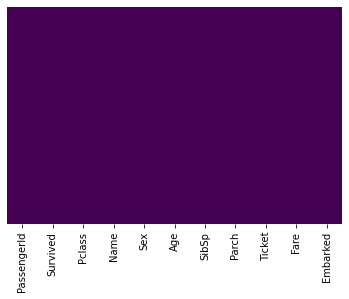

In [42]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#### Transforming Binary Data

In [44]:
sex = pd.get_dummies(train['Sex'], drop_first = True)

In [46]:
embark = pd.get_dummies(train['Embarked'], drop_first = True)

In [48]:
train = pd.concat([train, sex, embark], axis = 1)

In [49]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1,0,1


#### Cleaning Data

In [51]:
train.drop(['Sex' , 'Embarked', 'Name' , 'Ticket'], axis = 1, inplace = True)

In [54]:
train.drop('PassengerId', axis = 1, inplace = True)

In [55]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Machine Learning

In [58]:
X = train[['Pclass', 'Age', 'SibSp', 'Parch' , 'Fare', 'male', 'Q', 'S']]
y = train['Survived']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [61]:
from sklearn.linear_model import LogisticRegression

In [66]:
logmodel = LogisticRegression(max_iter=500)

In [73]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [68]:
predictions = logmodel.predict(X_test)

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
print(confusion_matrix(y_test, predictions))

[[150  13]
 [ 32  72]]
